<a href="https://colab.research.google.com/github/mohsenSarvariHero/Bioanformatics/blob/master/PCA%26ROCGSE36060.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# بارگذاری داده‌ها
healthy_data = pd.read_csv('p_deg_63060plot.csv')
disease_data = pd.read_csv('h_deg_63060plot.csv')

# افزودن برچسب
healthy_data['Label'] = 'Healthy'
disease_data['Label'] = 'Disease'

# ادغام داده‌ها
data = pd.concat([healthy_data, disease_data])

# جدا کردن برچسب‌ها
labels = data['Label']
data = data.drop(columns=['Label'])

# استانداردسازی داده‌ها
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# اجرای PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# تبدیل به DataFrame برای رسم
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Label'] = labels.values

# رسم نمودار
plt.figure(figsize=(8, 6))
for label, color in zip(['Healthy', 'Disease'], ['blue', 'red']):
    subset = pca_df[pca_df['Label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.7, color=color)

plt.title('PCA of Healthy vs Disease Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

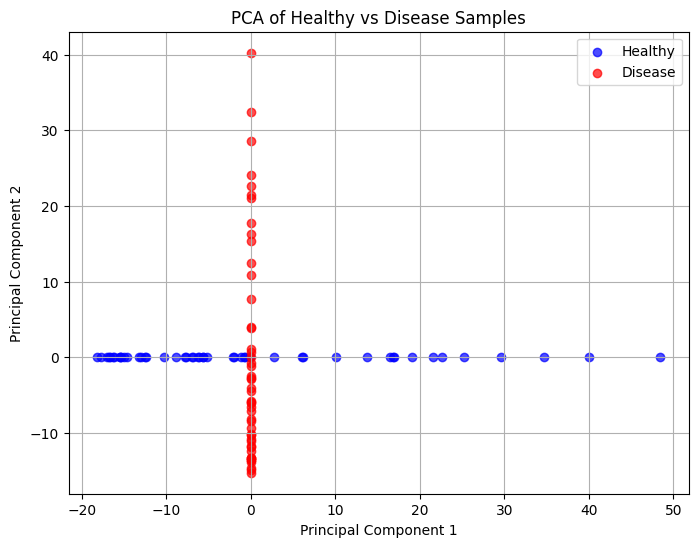

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# بارگذاری داده‌ها
healthy_data = pd.read_csv('p_deg_63060plot.csv')
disease_data = pd.read_csv('h_deg_63060plot.csv')

# افزودن برچسب
healthy_data['Label'] = 'Healthy'
disease_data['Label'] = 'Disease'

# ادغام داده‌ها
data = pd.concat([healthy_data, disease_data])

# جدا کردن برچسب‌ها
labels = data['Label']
data = data.drop(columns=['Label'])

# مدیریت مقادیر گم‌شده
imputer = SimpleImputer(strategy='mean')  # یا 'median' یا 'most_frequent'
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# استانداردسازی داده‌ها
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# اجرای PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# تبدیل به DataFrame برای رسم
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Label'] = labels.values

# رسم نمودار
plt.figure(figsize=(8, 6))
for label, color in zip(['Healthy', 'Disease'], ['blue', 'red']):
    subset = pca_df[pca_df['Label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.7, color=color)

plt.title('PCA of Healthy vs Disease Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import pandas as pd

# Load the uploaded files to inspect their structure
healthy_file_path = 'h_deg_63060plot.csv'
patient_file_path = 'p_deg_63060plot.csv'

# Load the CSV files
healthy_data = pd.read_csv(healthy_file_path)
patient_data = pd.read_csv(patient_file_path)

# Display the first few rows of each file
healthy_data.head(), patient_data.head()


(   Unnamed: 0  GSM1539119  GSM1539120  GSM1539121  GSM1539122  GSM1539123  \
 0         369    9.074077    8.912009    9.165980    9.239906    8.986426   
 1         317    9.791639   10.156760    9.529154   10.151595    9.147981   
 2        2776    8.115071    8.261458    7.962912    8.396880    8.257122   
 3        6647   11.243007   11.146995   11.033414   11.033414   10.865199   
 4        8878   10.138760    9.948981   10.307217   10.413448   10.111046   
 
    GSM1539124  GSM1539125  GSM1539126  GSM1539127  ...  GSM1539358  \
 0    9.018940    9.057343    9.145042    9.092738  ...    9.176544   
 1   10.445450    9.566451    9.942303   10.068619  ...    9.546520   
 2    8.466004    8.345239    8.581670    8.436414  ...    8.036702   
 3   11.031920   11.044639   10.475122   11.261619  ...   11.160969   
 4   10.266833   11.004371   10.649464   10.340138  ...   10.577034   
 
    GSM1539359  GSM1539360  GSM1539361  GSM1539362  GSM1539363  GSM1539364  \
 0    9.479891    9.3571

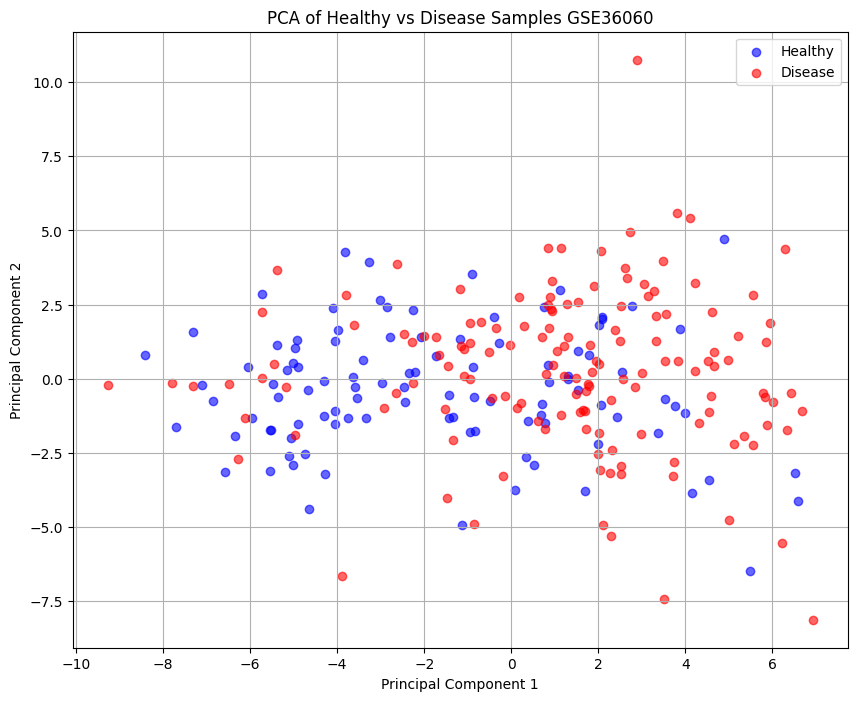

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Separate gene identifiers and data
healthy_genes = healthy_data.iloc[:, 0]
healthy_values = healthy_data.iloc[:, 1:]
patient_genes = patient_data.iloc[:, 0]
patient_values = patient_data.iloc[:, 1:]

# Check if genes match between the datasets
if not healthy_genes.equals(patient_genes):
    raise ValueError("Gene identifiers do not match between healthy and patient datasets.")

# Combine data and create labels
combined_data = pd.concat([healthy_values, patient_values], axis=1)
labels = np.array(['Healthy'] * healthy_values.shape[1] + ['Disease'] * patient_values.shape[1])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_data.T)  # Transpose for samples as rows

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Label'] = labels

# Plot PCA results
plt.figure(figsize=(10, 8))
for label, color in zip(['Healthy', 'Disease'], ['blue', 'red']):
    subset = pca_df[pca_df['Label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.6, color=color)
plt.title('PCA of Healthy vs Disease Samples GSE36060')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


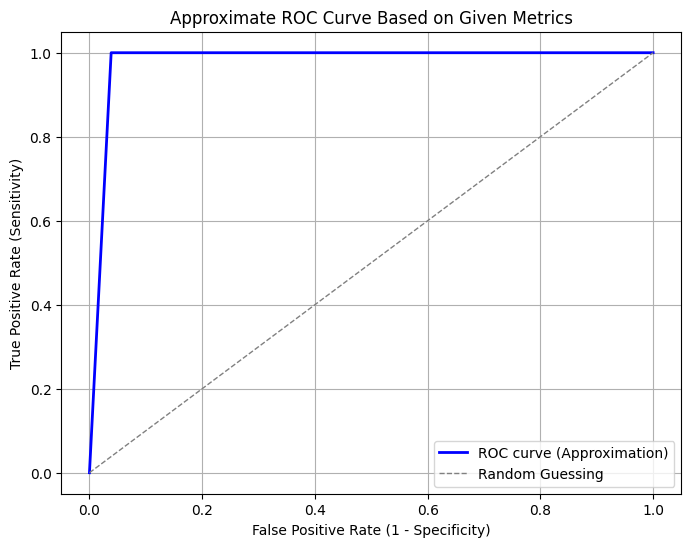

In [6]:
# Using the given values to plot an approximate ROC curve
# Sensitivity = TPR = 1, Specificity = 96.15%

# Specificity = 0.9615, so FPR = 1 - Specificity
fpr_fixed = [0, 0.0385, 1]  # Starting from 0 to 1
tpr_fixed = [0, 1, 1]       # Sensitivity = 1

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_fixed, tpr_fixed, color='blue', lw=2, label='ROC curve (Approximation)')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Approximate ROC Curve Based on Given Metrics')
plt.legend(loc='lower right')
plt.grid()
plt.show()
